In [30]:
# notes
# change Bayes Theorem to markdown

## Data Analysis
* Sampling
* Calculate likelihoods/probabilities
* Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### I. Bechdel Test Dataset 
* determine probability that a film will pass the test

In [2]:
df = pd.read_csv('my_data/updated_bechdel_4.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
7607,2014.0,Force Majeure,3.0,1.0,tt3630276,0.0,0.0,0.0,1.0,1.0,0.0,1358561.0
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0


In [19]:
df.shape

(7612, 12)

Add Captain Marvel to dataset because it was released after I scraped Bechdel Test website (though the revenue will not be accurate at this point). 

In [4]:
captain_marvel = pd.Series({'year': 2019.0, 'title': 'Captain Marvel', 'score': 3.0, 'passing': 1.0, 'imdb_id': 'tt4154664', 
                            'director_gender': 1.0, 'writer_gender': 1.0, 'exec_gender': 1.0, 'producer_gender': 1.0, 
                            'overall_gender': 4.0, 'budget': 160000000, 'revenue': 890000000})
captain_marvel

year                         2019
title              Captain Marvel
score                           3
passing                         1
imdb_id                 tt4154664
director_gender                 1
writer_gender                   1
exec_gender                     1
producer_gender                 1
overall_gender                  4
budget                  160000000
revenue                 890000000
dtype: object

In [5]:
df = df.append(captain_marvel, ignore_index=True)

In [6]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0
7612,2019.0,Captain Marvel,3.0,1.0,tt4154664,1.0,1.0,1.0,1.0,4.0,160000000.0,890000000.0


In [23]:
df.passing.value_counts()

1.0    4362
0.0    3251
Name: passing, dtype: int64

In [7]:
df.to_csv('my_data/updated_bechdel_5.csv', index=False)

#### Probability of randomly selected film passing

In [24]:
passing_proba = 4362/len(df)
passing_proba = round((passing_proba * 100),2)
passing_proba

57.3

#### Verify probability of randomly selected film passing with random sampling

In [29]:
sample_passing = []
for i in range(100):
    sample = df.sample(n=100, replace=True, random_state=19)
    passing = sample.passing.value_counts()[1]
    sample_passing.append(passing)

print(f'The mean passing value of 100 samples is {np.mean(sample_passing)}')

The mean passing value of 100 samples is 57.0


In [27]:
test_sample = df.sample(n=100)
print(test_sample.passing.value_counts())
print(test_sample.passing.value_counts()[1])

1.0    67
0.0    33
Name: passing, dtype: int64
67


#### Conditional Probability, Bayes Theorem, & Likelihood
Visualizations have shown that films with a director and/or writer of an underrepresented gender are more likely to pass the Test </br>
P(A|B) = P(A) * P(B|A) / P(B)

P(A) = Probability of a film passing the Bechdel Test for this dataset </br>
P(B) = Probability of a film having a director of an underrepresented gender </br>
P(C) = Probability of a film having a writer of an underrepresented gender </br>

In [34]:
director_proba = round((df.director_gender.value_counts()[1] / len(df)),2)
director_proba

0.1

In [36]:
writer_proba = round((df.writer_gender.value_counts()[1] / len(df)), 2)
writer_proba

0.16

P(A) = 0.57 </br>
P(B) = 0.1 </br>
P(C) = 0.16

#### Likelihood
P(B|A) = probability of director of underrepresented gender, given a passing test </br>
P(C|A) = probability of writer of underrepresented gender, given a passing test

In [39]:
passing_movies = df.loc[df.passing == 1]
passing_movies.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
6,2018.0,6 Balloons,3.0,1.0,tt6142496,1.0,1.0,0.0,0.0,2.0,0.0,0.0
10,2018.0,A Simple Favor,3.0,1.0,tt7040874,0.0,1.0,0.0,1.0,2.0,20000000.0,42600000.0
11,2018.0,A Star Is Born,3.0,1.0,tt1517451,0.0,1.0,0.0,0.0,1.0,36000000.0,403588149.0


In [40]:
passing_movies.shape

(4362, 12)

In [41]:
director_proba_with_passing = round((passing_movies.director_gender.value_counts()[1] / len(passing_movies)),2)
director_proba_with_passing

0.14

In [44]:
writer_proba_with_passing = round((passing_movies.writer_gender.value_counts()[1] / len(passing_movies)), 2)
writer_proba_with_passing

0.22

P(B|A) = 0.14 </br>
P(C|A) = 0.22

In [45]:
proba_passing_with_director = (0.57 * 0.14) / 0.1
proba_passing_with_director

0.7979999999999999

In [46]:
proba_passing_with_writer = (0.57 * 0.22) / 0.16
proba_passing_with_writer

0.7837499999999998

P(A|B) = probability of passing test, given director of underrepresented gender = 0.8 </br>
P(A|C) = probability of passing test, given writer of underrepresented gender = 0.78

## II. Hypothesis Testing - is there a significant difference in budget and/or revenue in passing vs. non-passing movies?

Analyze only those movies in the dataset that have a non-zero budget and revenue.

In [8]:
budget_revenue_df = pd.read_csv('my_data/non_zero_scaled_budgets_revenues_2.csv')
budget_revenue_df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170.0,359.700000
1,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17.0,259.168321
2,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17.0,340.939361
3,2018.0,A Simple Favor,3.0,1.0,tt7040874,0.0,1.0,0.0,1.0,2.0,20.0,42.600000
4,2018.0,A Star Is Born,3.0,1.0,tt1517451,0.0,1.0,0.0,0.0,1.0,36.0,403.588149


### Hypothesis 1
* H0 - There is no statistically significant difference between the budgets of films that pass the Bechdel Test and films that do not pass the Bechdel Test. </br>
    * $H_0$: $\mu_1$ = $\mu_2$
* H1 - There is a statistically significant difference bettween the budgets of films that pass the Bechdel Test and films that do not pass the Bechdel Test.
    * $H_a$: $\mu_1$ $\neq$ $\mu_2$  

#### Budget Distributions

In [9]:
import plotly.figure_factory as ff

In [11]:
passing_movies = budget_revenue_df.query('passing == 1')
passing_movies.shape

(1904, 12)

In [12]:
non_passing_movies = budget_revenue_df.query('passing == 0')
non_passing_movies.shape

(1595, 12)

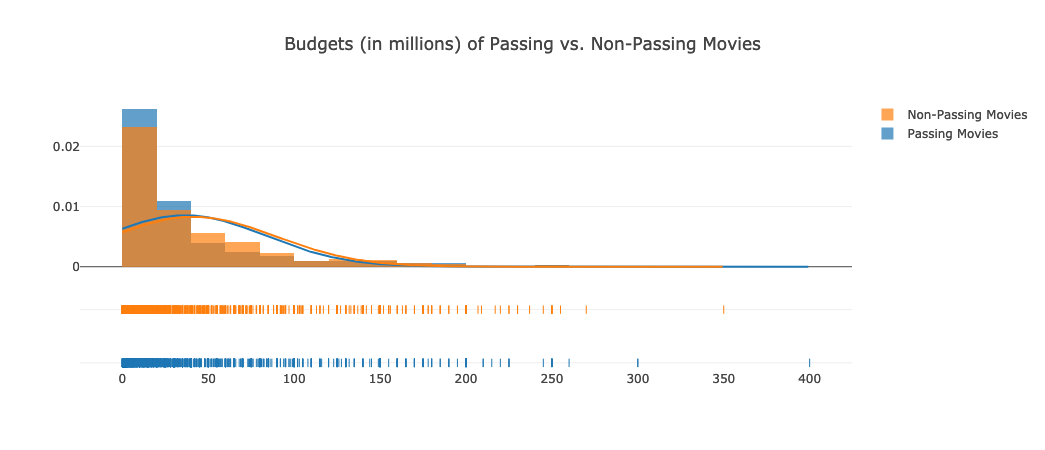

In [28]:
x1 = passing_movies.budget_millions
x2 = non_passing_movies.budget_millions

hist_data = [x1, x2]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', bin_size=20)
fig['layout'].update(title='Budgets (in millions) of Passing vs. Non-Passing Movies')
iplot(fig)

In [20]:
from scipy import stats

In [21]:
x1_mu = passing_movies.budget_millions.mean()
x2_mu = non_passing_movies.budget_millions.mean()

x1_var = passing_movies.budget_millions.std()
x2_var = non_passing_movies.budget_millions.std()

print(f'Mean budget of passing movies: {x1_mu}')
print(f'Mean budget of non-passing movies: {x2_mu}')
print(f'Variance in budgets of passing movies: {x1_var}')
print(f'Variance in budgets on non-passing movies: {x2_var}')

Mean budget of passing movies: 36.34017572452731
Mean budget of non-passing movies: 41.38629381065831
Variance in budgets of passing movies: 46.648005131918026
Variance in budgets on non-passing movies: 48.03875617001384


In [30]:
# Check log-normal distributions

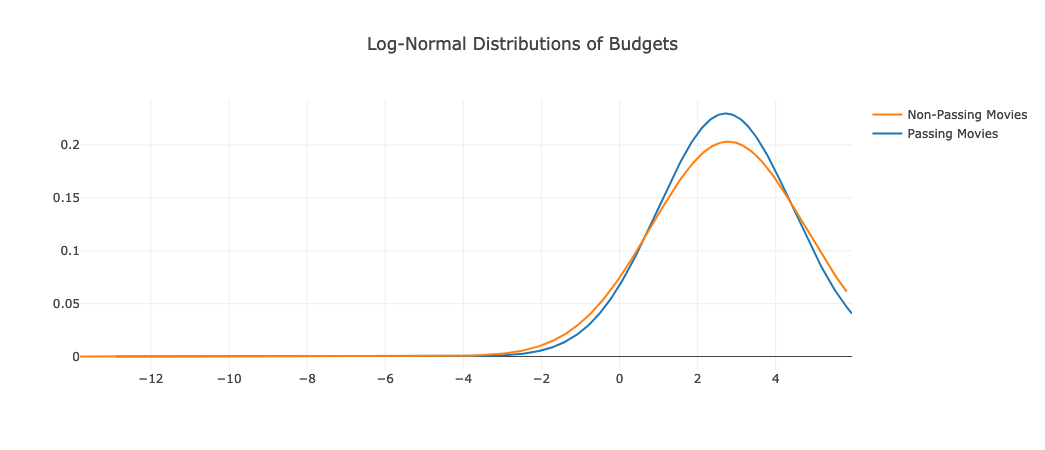

In [31]:
x1 = passing_movies.budget_millions
x2 = non_passing_movies.budget_millions

hist_data = [np.log(x1), np.log(x2)]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', show_hist=False, show_rug=False, bin_size=20)
fig['layout'].update(title='Log-Normal Distributions of Budgets')
iplot(fig)

In [33]:
t,p = stats.ttest_ind(x1, x2)
if p < 0.05:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the budgets \
    of passing vs. non-passing movies can be rejected.')
else:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the budgets \
    of passing vs. non-passing movies cannot be rejected.')

With a p-value of 0.0016815624295128007, the null hypothesis that there is no statistically significant difference in the budgets     of passing vs. non-passing movies can be rejected.
